# Interactions - Lab

## Introduction

In this lab, you'll explore interactions in the Ames Housing dataset.

## Objectives

You will be able to:
- Implement interaction terms in Python using the `sklearn` and `statsmodels` packages 
- Interpret interaction variables in the context of a real-world problem 

## Build a baseline model 

You'll use a couple of built-in functions, which we imported for you below: 

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

If you still want to build a model in the end, you can do that, but this lab will just focus on finding meaningful insights in interactions and how they can improve $R^2$ values.

In [2]:
regression = LinearRegression()

Create a baseline model which includes all the variables we selected from the Ames housing data set to predict the house prices. Then use 10-fold cross-validation and report the mean $R^2$ value as the baseline $R^2$.

In [3]:
ames = pd.read_csv('ames.csv')

continuous = ['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
categoricals = ['BldgType', 'KitchenQual', 'SaleType', 'MSZoning', 'Street', 'Neighborhood']
#categoricals = ['BldgType', 'KitchenQual', 'SaleType', 'MSZoning', 'Street']

# code here
ames_cont = ames[continuous]  # all my continuous data

#1 Use log for cont features
log_names = [f'{column}_log' for column in ames_cont.columns]

ames_log = np.log(ames_cont)
ames_log.columns = log_names

#2  normalize (subract mean and divide by std)
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

ames_log_norm = ames_log.apply(normalize)  
 
    
    
#3 one hot encode categorical data
ames_ohe = pd.get_dummies(ames[categoricals], prefix=categoricals)


#4 Combine my data columns into one pd
preprocessed = pd.concat([ames_cont, ames_ohe], axis=1) # combine columns

#5  Make my X y for validataion
X = preprocessed.drop('SalePrice', axis=1)
y = preprocessed['SalePrice']

#6 cross validata and get rsquared
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X, y, scoring='r2', cv=crossvalidation))

baseline




# HARD WAY (I chose this...)
# salePrice = ames['SalePrice']
# logLotArea = np.log(ames['LotArea'])
# logFirstFloorSF = np.log(ames['1stFlrSF'])
# logGrLivArea= np.log(ames['GrLivArea'])

# scaled_salePrice = (salePrice-min(salePrice))/(max(salePrice)-min(salePrice))
# scaled_lotArea = (logdisp-np.mean(logLotArea))/np.sqrt(np.var(logLotArea))
# scaled_1stFlrSF = (loghorse-np.mean(logFirstFloorSF))/(max(logFirstFloorSF)-min(logFirstFloorSF))
# scaled_GrLivArea= (logweight-np.mean(logGrLivArea))/np.sqrt(np.var(logGrLivArea))

# data_fin = pd.DataFrame([])
# data_fin['SalePrice'] = scaled_salePrice
# data_fin['LotArea']= scaled_LotArea
# data_fin['1stFlrSF'] = scaled_1stFlrSF
# data_fin['GrLivArea'] = scaled_GrLivArea
# salePrice = data['SalePrice']  # Grab the new one
# data_fin = pd.concat([salePrice, data_fin, data['cylinders'], data['model year'], data['origin']], axis=1)
# y = data_fin[['mpg']]
# X = data_fin.drop(['mpg'], axis=1)

0.777381712804318

## See how interactions improve your baseline

Next, create all possible combinations of interactions, loop over them and add them to the baseline model one by one to see how they affect the $R^2$. We'll look at the 3 interactions which have the biggest effect on our $R^2$, so print out the top 3 combinations.

You will create a `for` loop to loop through all the combinations of 2 predictors. You can use `combinations` from itertools to create a list of all the pairwise combinations. To find more info on how this is done, have a look [here](https://docs.python.org/2/library/itertools.html).

Since there are so many different neighbourhoods we will exclude

In [4]:
from itertools import combinations

In [5]:
# code to find top interactions by R^2 value here
#combinations?
combos = combinations(X.columns, 2)
data = X.copy()
scores = []

for a, b in combos:
    #print(a, b)
    data['interaction'] = data[a] * data[b]
    score = np.mean(cross_val_score(regression, data, y, scoring='r2', cv=crossvalidation))
    scores.append([a, b, score])     



In [6]:
scores.sort(key=lambda x: x[-1])
scores[-3:]

[['1stFlrSF', 'Neighborhood_Edwards', 0.8033414554230726],
 ['GrLivArea', 'Neighborhood_Edwards', 0.8077114235220245],
 ['LotArea', 'Neighborhood_Edwards', 0.8093363403933006]]

It looks like the top interactions involve the Neighborhood_Edwards feature so lets add the interaction between LotArea and Edwards to our model.

We can interpret this feature as the relationship between LotArea and SalePrice when the house is in Edwards or not.

## Visualize the Interaction

Separate all houses that are located in Edwards and those that are not. Run a linear regression on each population against `SalePrice`. Visualize the regression line and data points with price on the y axis and LotArea on the x axis.

[11.66371067 11.73464147 11.73135077 11.71826243 11.70513365 11.55911965
 11.71920171 11.72535324 11.75191048 11.71226843 11.55911965 11.70527386
 11.65473798 11.72901756 11.70797576 11.69611823 11.73987669 11.74929035
 11.71258525 11.6864177  11.72432976 11.70335272 11.68474943 11.7032815
 11.71883939 11.71883939 11.69973874 11.74940674 11.74699798 11.72234127
 11.60420871 11.7137137  11.89039168 11.71276968 11.68137574 11.70846797
 11.76358759 11.81731109 11.74432758 11.6943352  11.70102333 11.70846797
 11.72938478 11.71258525 11.72333362 11.7242341  11.67485416 11.67101761
 11.69991472 11.75811686 11.73330719 11.7032815  11.70982471 11.69462656
 11.70102333 11.7435768  11.68178563 11.78381539 11.78861976 11.70846797
 11.69296087 11.71668039 11.71731572 11.73419102 11.72653243 11.72197616
 11.68178563 11.74082812 11.76161668 11.73658845 11.70549787 11.69098782
 11.69661638 11.55911965 11.71048395 11.71674408 11.74770801 11.79284151
 11.76203615 11.70227993 11.72091098 11.71591353 11.

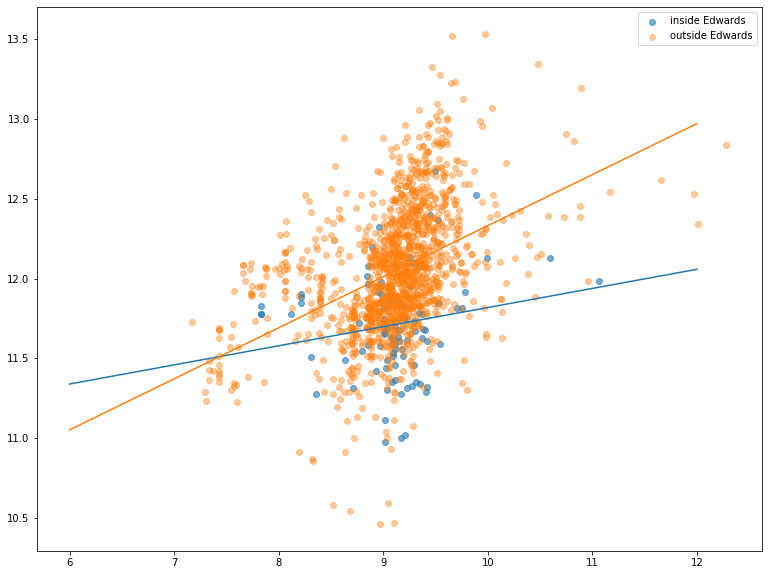

In [7]:
# Visualization code here
edwards = preprocessed.copy()
not_edwards = preprocessed.copy()



edwards = edwards[edwards['Neighborhood_Edwards'] == True]
regression = LinearRegression()
x = np.log(edwards[['LotArea']])
y = np.log(edwards['SalePrice'])
regression.fit(x, y)

predict = regression.predict(x)
print(predict)

fig, ax = plt.subplots(figsize=(13, 10))
ax.scatter(x, y, label='inside Edwards', alpha=0.6)

x = np.linspace(6, 12)
ax.plot(x, regression.predict(x.reshape(-1, 1)))




not_edwards = not_edwards[not_edwards['Neighborhood_Edwards'] == False]
regression = LinearRegression()
x = np.log(not_edwards[['LotArea']])
y = np.log(not_edwards['SalePrice'])
regression.fit(x, y)

predict = regression.predict(x)
print(predict)

ax.scatter(x, y, alpha=0.4, label='outside Edwards')
x = np.linspace(6, 12)
ax.plot(x, regression.predict(x.reshape(-1, 1)))
ax.legend()


## Build a final model with interactions

Use 10-fold cross-validation to build a model using the above interaction. 

In [9]:
# code here

regression = LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
final = X.copy()
y = preprocessed['SalePrice']


final['Neighborhood_Edwards*LotArea'] = final['Neighborhood_Edwards'] * final['LotArea']

final_model = np.mean(cross_val_score(regression, final, y, scoring='r2', cv=crossvalidation))

final_model

0.8093363403933006

Our $R^2$ has increased considerably! Let's have a look in `statsmodels` to see if this interactions are significant.

In [10]:
# code here

import statsmodels.api as sm
df_inter_sm = sm.add_constant(final)  # add column of 1's to array
model = sm.OLS(y,final)
results = model.fit()

results.summary()

/Users/aaronlee/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     148.6
Date:                Tue, 30 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:00:37   Log-Likelihood:                -17229.
No. Observations:                1460   AIC:                         3.456e+04
Df Residuals:                    1411   BIC:                         3.482e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
LotArea                          0.6108      0.103      5.916      0.000       0.408       0.813
1stFlrSF                        35.0664      3.288     10.664      0.000      28.616      41.517
GrLivArea                       58.1426      2.405     24.171      0.000      53.424      62.861
BldgType_1Fam                 2.922e+04   2902.954     10.066      0.000    2.35e+04    3.49e+04
BldgType_2fmCon               1.242e+04   5897.809      2.105      0.035     847.853     2.4e+04
BldgType_Duplex              -3641.5299   4775.013     -0.763      0.446    -1.3e+04    5725.358
BldgType_Twnhs               -7057.2521   5689.576     -1.240      0.215   -1.82e+04    4103.687
BldgType_TwnhsE               5879.6997   3832.141      1.534      0.125   -1637.606    1.34e+04
KitchenQual_Ex                6.041e+04   4203.276     14.371      0.000    5.22e+04    6.87e+04
KitchenQual_Fa               -2.033e+04   4811.017     -4.225      0.000   -2.98e+04   -1.09e+04
KitchenQual_Gd                6309.0317   2725.293      2.315      0.021     962.969    1.17e+04
KitchenQual_TA               -9568.2577   2512.797     -3.808      0.000   -1.45e+04   -4639.037
SaleType_COD                 -1.616e+04   6414.150     -2.519      0.012   -2.87e+04   -3575.093
SaleType_CWD                  5095.8845   1.54e+04      0.330      0.741   -2.52e+04    3.54e+04
SaleType_Con                  4.676e+04   2.18e+04      2.149      0.032    4071.965    8.95e+04
SaleType_ConLD                 267.8450   1.11e+04      0.024      0.981   -2.14e+04    2.19e+04
SaleType_ConLI                 888.5698   1.39e+04      0.064      0.949   -2.64e+04    2.82e+04
SaleType_ConLw               -5236.1620    1.4e+04     -0.375      0.708   -3.26e+04    2.22e+04
SaleType_New                  1.611e+04   5396.453      2.986      0.003    5528.209    2.67e+04
SaleType_Oth                 -7445.4890   1.76e+04     -0.423      0.673    -4.2e+04    2.71e+04
SaleType_WD                  -3470.6182   4492.513     -0.773      0.440   -1.23e+04    5342.104
MSZoning_C (all)             -1.649e+04   1.06e+04     -1.553      0.121   -3.73e+04    4333.248
MSZoning_FV                    2.15e+04   7819.714      2.749      0.006    6156.896    3.68e+04
MSZoning_RH                   1565.0621   8028.716      0.195      0.845   -1.42e+04    1.73e+04
MSZoning_RL                   1.276e+04   3975.156      3.210      0.001    4963.351    2.06e+04
MSZoning_RM                   1.748e+04   4540.010      3.851      0.000    8578.857    2.64e+04
Street_Grvl                   2.003e+04   1.02e+04      1.961      0.050      -1.589    4.01e+04
Street_Pave                   1.679e+04   5572.202      3.012      0.003    5855.136    2.77e+04
Neighborhood_Blmngtn          1.084e+04   8819.610      1.229      0.219   -

What is your conclusion here?

In [ ]:
# formulate your conclusion

# The R-squared value increased significantly. Including the interaction improved the model.


## Summary

You should now understand how to include interaction effects in your model! As you can see, interactions can have a strong impact on linear regression models, and they should always be considered when you are constructing your models.